In [1]:
import random
import numpy as np
from engine import Value
from nn import Neuron,Layer,MLP


In [2]:
random.seed(42)

## The input data

In [3]:

X = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0]
]

## The predictor values

In [4]:
y = [1.0,-1.0,-1.0,1.0]

## The model
The model is a multi-layer percepron with 3 layers of size `[4,4,1]`

In [5]:
model=MLP(3,[4,4,1])
#pass the input data to the model to get predictions 
y_pred=[model(x) for x in X]

## The Loss function(MSE)

In [6]:
loss=sum((yout-ygt)**2 for ygt, yout in zip(y,y_pred))
loss

Value(data=5.230517512042234)

## Visualising the computation graph

In [7]:
#helper functions 
from graphviz import Digraph

def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir': 'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad ), shape='record')
        if n._op:
            dot.node(name=uid + n._op,label=n._op)
            dot.edge(uid + n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot 

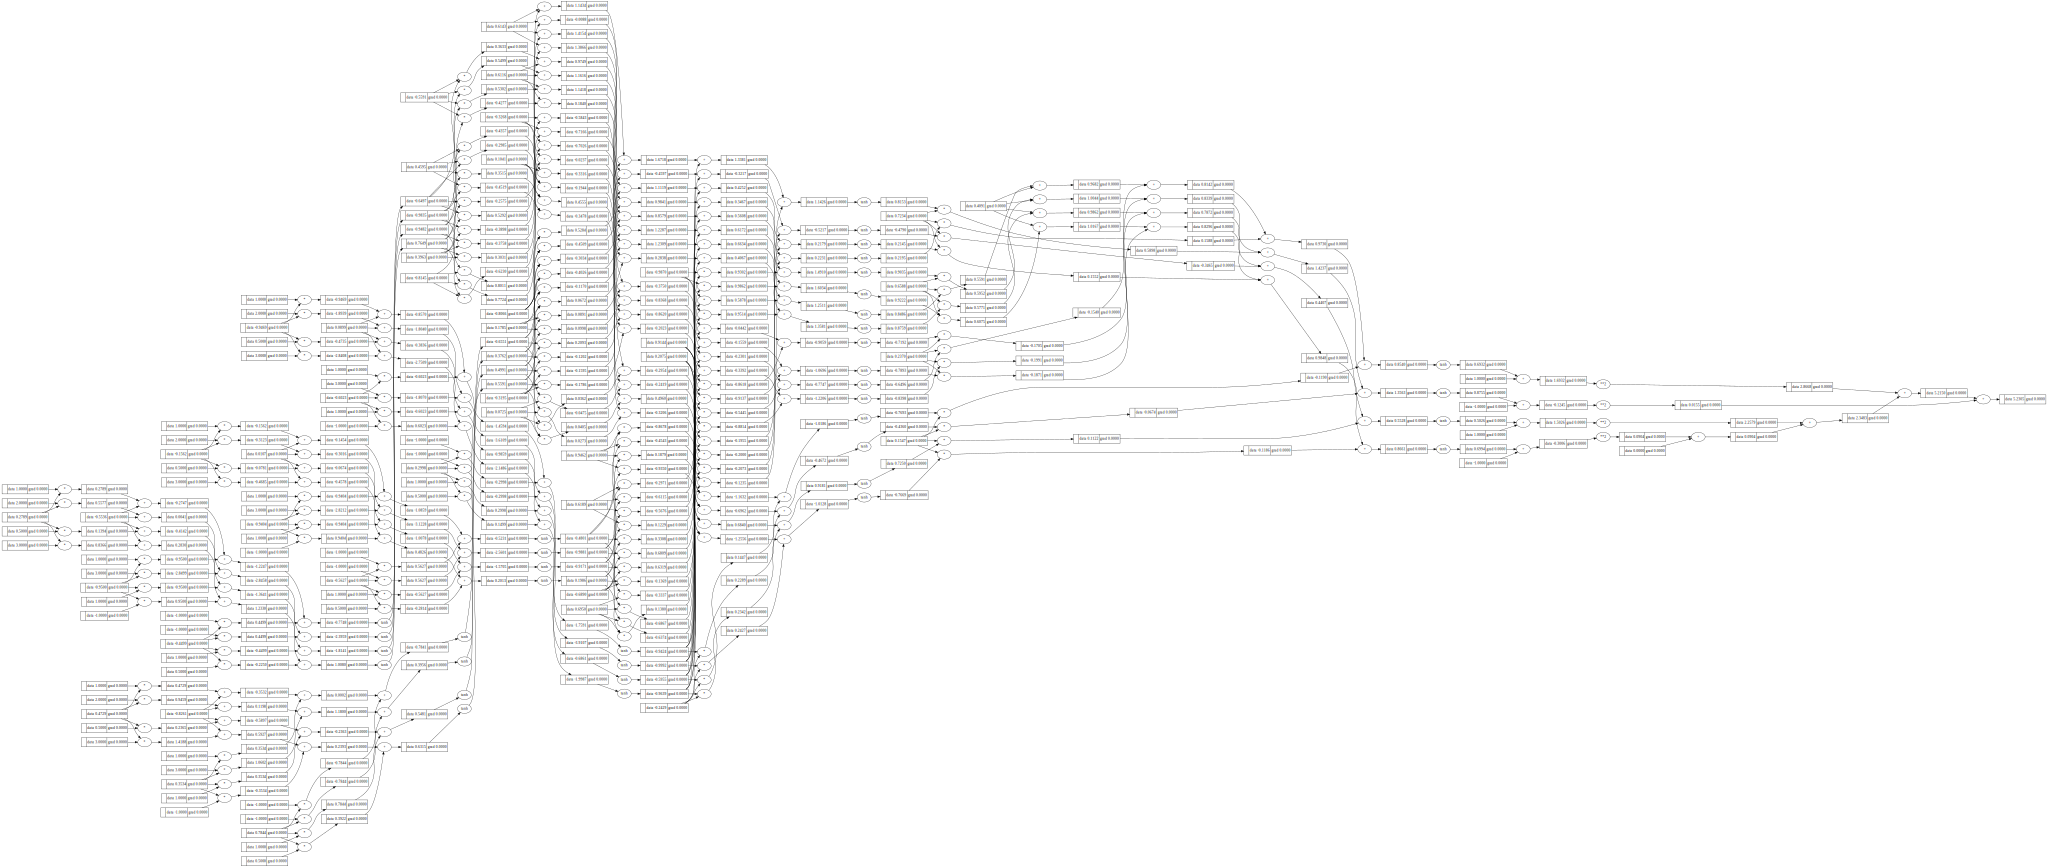

In [8]:
draw_dot(loss)

##  Optimisation

In [9]:
epochs=50
learning_rate=0.05
for k in range(epochs):
    #forward pass
    y_pred=[model(x) for x in X]
    loss=sum((yout-ygt)**2 for ygt, yout in zip(y,y_pred))
    #zero grad
    for p in model.parameters():
        p.grad=0.0
    #backward pass
    loss.backward()
    #update
    for p in model.parameters():
        p.data+=-learning_rate*p.grad
    print(f'epoch:{k}:loss:',loss.data)



epoch:0:loss: 5.230517512042234
epoch:1:loss: 2.704689050764245
epoch:2:loss: 1.846023725231498
epoch:3:loss: 1.1774870087919076
epoch:4:loss: 0.8217294550832634
epoch:5:loss: 0.595721558769391
epoch:6:loss: 0.43115794091632753
epoch:7:loss: 0.3468314917603139
epoch:8:loss: 0.28903713992681346
epoch:9:loss: 0.24605065583938188
epoch:10:loss: 0.21309389813936697
epoch:11:loss: 0.18718814718937837
epoch:12:loss: 0.16638755353165702
epoch:13:loss: 0.14937997337031497
epoch:14:loss: 0.1352548466184191
epoch:15:loss: 0.12336389545940175
epoch:16:loss: 0.11323493741060485
epoch:17:loss: 0.10451700918771248
epoch:18:loss: 0.09694449026136842
epoch:19:loss: 0.09031307448189846
epoch:20:loss: 0.0844633193777594
epoch:21:loss: 0.07926915605261727
epoch:22:loss: 0.07462971653102284
epoch:23:loss: 0.07046342351292455
epoch:24:loss: 0.06670365095846886
epoch:25:loss: 0.0632954934443144
epoch:26:loss: 0.060193330099191034
epoch:27:loss: 0.057358965971844124
epoch:28:loss: 0.054760198481079034
epoch:

In [10]:
y_pred

[Value(data=0.9132534462181872),
 Value(data=-0.9472718485713151),
 Value(data=-0.8935757158302718),
 Value(data=0.9255866224042353)]

The Loss goes down at every epoch nearing zero, and y_pred becomes more and more accurate as well. 